In [1]:
import numpy as np
import matplotlib.pylab as plt

In [11]:
def show(img, show_num=True):
    plt.imshow(img, cmap='gray')
    if show_num:
        for (j,i), label in np.ndenumerate(img.astype(np.int)):
            plt.text(i, j, label, ha='center', va='center', fontdict={'color':'blue', 'size':'20'})
    plt.axis('image')
    plt.show()

## filter / kernel

gennerate random image

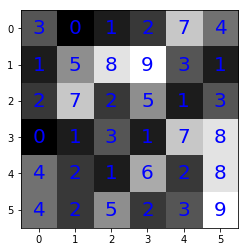

In [3]:
img = np.array([[3,0,1,2,7,4],[1,5,8,9,3,1],[2,7,2,5,1,3],[0,1,3,1,7,8],[4,2,1,6,2,8],[4,2,5,2,3,9]])
show(img)

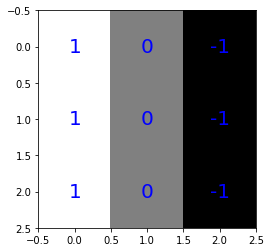

In [4]:
kernel = np.array([[1,0,-1], [1,0,-1], [1,0,-1]])
show(kernel)

In [5]:
def convolution(img, kernel):
    height_img, weight_img = img.shape
    height_ker, weight_ker = kernel.shape
    h_size = height_img - height_ker + 1
    w_size = weight_img - weight_ker + 1
    result = np.zeros((h_size, w_size))
    for i in np.arange(h_size):
        for j in np.arange(w_size):
            result[i, j] = np.sum(img[i:(i+height_ker), j:(j+weight_ker)] * kernel)
    return result

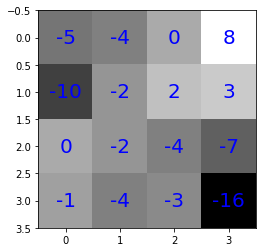

In [6]:
filtered_img = convolution(img, kernel)
show(filtered_img)

how can it detact edge?

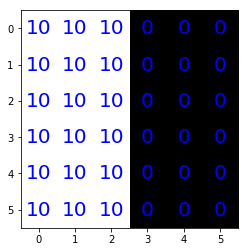

In [9]:
img = np.array([[10, 10, 10, 0, 0, 0]*6]).reshape(6, 6)
show(img)

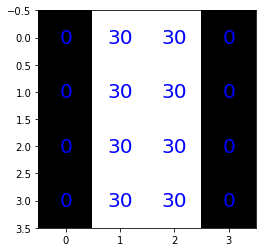

In [13]:
show(convolution(img, kernel), show_num=True)

do it for real image

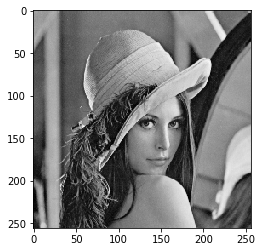

In [15]:
img = plt.imread('../dataset/lena_gray.png')
show(img, show_num=False)

In [18]:
filter_dict = {'ver': np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),
               'hor': np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]),
               'sobel_ver': np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
               'sobel_hor': np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),
               'scharr_ver': np.array([[3, 0, -3], [10, 0, -10], [3, 0, -3]]),
               'scharr_hor': np.array([[3, 10, 3], [0, 0, 0], [-3, -10, -3]])}

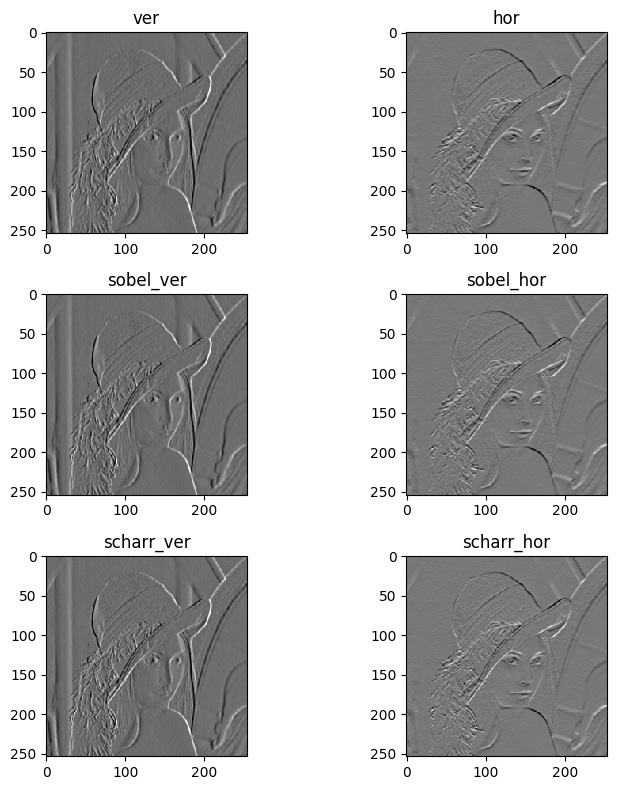

In [42]:
fig = plt.figure(figsize=(8, 8), dpi=100)
for i, (k, kernel) in enumerate(filter_dict.items(), 1):
    ax = fig.add_subplot(3, 2, i)
    filtered_img = convolution(img, kernel)
    ax.imshow(filtered_img, cmap='gray')
    ax.set_title(k)
plt.tight_layout()

## padding

In [ ]:
def convolution(img, kernel, padding=1):
    height_img, weight_img = img.shape
    height_ker, weight_ker = kernel.shape
    h_size = height_img + 2 * padding - height_ker + 1
    w_size = weight_img + 2 * padding - weight_ker + 1
    result = np.zeros((h_size, w_size))
    for i in np.arange(h_size):
        for j in np.arange(w_size):
            result[i, j] = np.sum(img[i:(i+height_ker), j:(j+weight_ker)] * kernel)
    return result